In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import norm

In [2]:
myArray = norm.rvs(loc=200, scale=20, size=10000)
myArray

array([194.8139994 , 179.72216449, 195.6714087 , ..., 223.04560921,
       202.82009919, 208.53519932])

In [3]:
def generateZ(array):
    newArray = []
    for item in array:
        z = (item - 20) / 200
        newArray.append(z)
    return newArray

In [4]:
newArray = generateZ(myArray)
newArray

[0.8740699970224578,
 0.7986108224628401,
 0.8783570435105044,
 0.8303578123445712,
 0.9822021830493795,
 0.7982321443759378,
 0.9638561726929461,
 0.8358900686597918,
 1.017592642625961,
 1.0811853559512212,
 0.8007961030252916,
 0.7992744783013017,
 1.0896832557232505,
 0.8240338147080708,
 0.9273516914655877,
 0.895121948775579,
 0.7566372350675741,
 0.7865212487635423,
 1.0071132127031344,
 0.8028598303402933,
 0.9431697684257346,
 1.0095490549641362,
 0.8400923110550308,
 0.8791039433566564,
 1.1179038262342527,
 0.9363348693532505,
 0.9089407702569793,
 0.9413648648069988,
 0.8291217957900991,
 0.8426837189105051,
 0.7819517109476543,
 0.8881078960147836,
 1.0633599042559452,
 0.9615718525305417,
 0.7754724192767306,
 0.8545506708678033,
 0.7654781544991676,
 0.7113814860201524,
 0.9018098676427501,
 0.7335552794932352,
 0.9099175082516027,
 0.8227735564467684,
 0.9254219057936831,
 0.875133608082741,
 0.9050798800332935,
 0.8750698240082722,
 0.8438928454221746,
 0.8964418485042

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


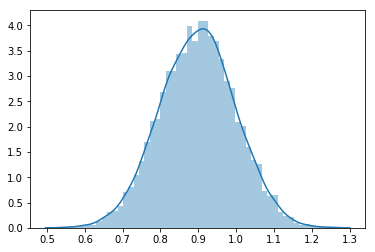

In [5]:
sns.distplot(newArray)

In [6]:
def calculate_z_score(sample_mean, population_mean, st_devliation, population_size):
    z_score = (sample_mean - population_mean) / (st_devliation / math.sqrt(population_size))
    return z_score

In [7]:
def calculate_p_value(survivor_function, z_score):
    p_value = 2 * survivor_function(np.absolute(z_score))
    return p_value

In [8]:
def does_it_work(p_value, confidence_level):
    if p_value < confidence_level:
        return True
    return False

In [9]:
z_score = calculate_z_score(1.05, 1.2, 0.5, 100)
z_score

-2.9999999999999982

In [10]:
p_value = calculate_p_value(norm.sf, z_score)
p_value

0.0026997960632602026

In [11]:
does_it_work(p_value, 0.5)

True

In [12]:
x = np.array([177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5])

In [13]:
def calculate_t_score(sample_data, population_mean):
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    sample_size = len(sample_data)
    
    t_score = (sample_mean - population_mean) / (sample_std / math.sqrt(sample_size))
    return t_score

In [14]:
t_score = calculate_t_score(x, 175.3)
t_score

2.295568968083183

In [15]:
stats.ttest_1samp(x, 175.3)

Ttest_1sampResult(statistic=2.295568968083183, pvalue=0.04734137339747034)

In [1]:
def should_use_z_score(sample_size, population_std):
    if population_std == None:
        return False
    if sample_size <= 30:
        return False
    return True

In [10]:
should_use_z_score(31, 2)

True